In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
path = "tvmarketing.csv"
adv = pd.read_csv(path)

In [4]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<AxesSubplot:xlabel='TV', ylabel='Sales'>

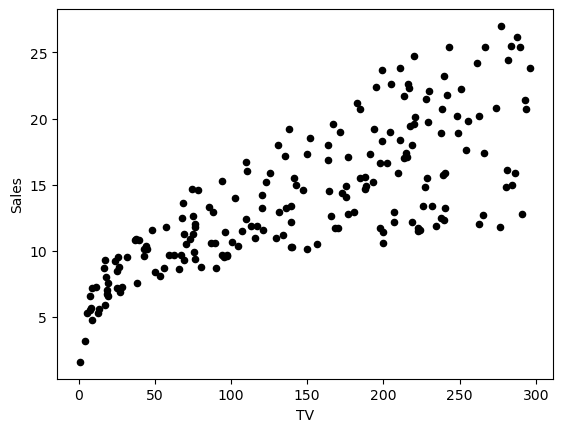

In [5]:
adv.plot(x='TV',y='Sales',kind='scatter',c='black')

In [6]:
advNorm=(adv-np.mean(adv))/np.std(adv)

C:\Users\Z004K1SD\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [7]:
advNorm

,TV,Sales
0,0.969852,1.552053
1,-1.197376,-0.696046
2,-1.516155,-0.907406
3,0.052050,0.860330
4,0.394182,-0.215683
...,...,...
195,-1.270941,-1.234053
196,-0.617035,-0.830548
197,0.349810,-0.234898
198,1.594565,2.205347


<AxesSubplot:xlabel='TV', ylabel='Sales'>

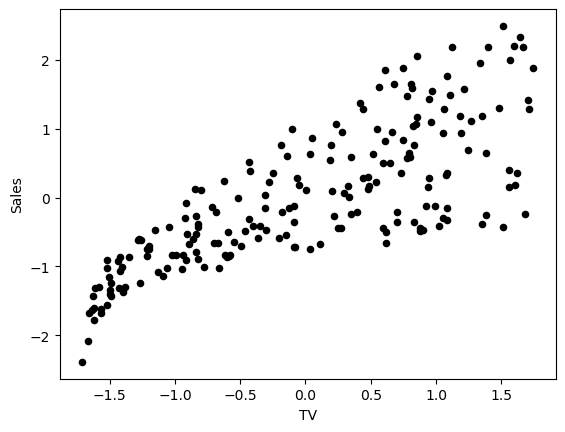

In [11]:
advNorm.plot(x='TV',y='Sales',kind='scatter',c='black')


In [15]:
xNorm=np.array(advNorm['TV']).reshape(1,len(advNorm['TV']))
yNorm=np.array(advNorm['Sales']).reshape(1,len(advNorm['Sales']))

In [16]:
xNorm.shape

(1, 200)

In [19]:
def LayerSize(x,y):
    ipLayerSize=x.shape[0]
    opLayerSize=y.shape[0]
    return ipLayerSize,opLayerSize
    
ipLayerSize,opLayerSize=LayerSize(xNorm,yNorm)


In [25]:
def InitializeParameter(ipLayerSize,opLayerSize):
    w=np.random.randn(ipLayerSize,opLayerSize) * 0.01   
    """Multiplying with 0.01 in order to Initilize with Small No """
    b=np.zeros((opLayerSize,1))
    
    param={'w':w,
          'b':b}
    return param

parameters=InitializeParameter(ipLayerSize,opLayerSize)

In [26]:
parameters

{'w': array([[0.00508219]]), 'b': array([[0.]])}

In [34]:
def ForwardPropogation(x,parameters): 
    """Dont Confuse With NeuralNetworks,But Just FOr Name Sake,It will Initalize the Linear Eqn with available W and B values ,Which is then Optimized by using Loss Function"""
    """But You can link this Function Concept With ForwardPropogation Concept in Neural Network ,Which Inturn will imporve your Intuition """
    w=parameters['w']
    b=parameters['b']
    yHat=np.matmul(w,x)+b
    return yHat

yHat=ForwardPropogation(xNorm,parameters)
yHat[0,0:10]

array([ 0.00492897, -0.00608529, -0.00770538,  0.00026453,  0.00200331,
       -0.00820981, -0.00531382, -0.00159294, -0.00821574,  0.00313084])

In [35]:
"""Basic Model is There ,Now we are Going to optimize it Using Cost Fuction ,THis is also called Backward Propogation ,Just for your Intuition"""
def CostFunction(y,yHat):
    m=yHat.shape[1]
    error=np.sum((yHat-y)**2) * 1/(2*m)
    return error

CostFunction(yNorm,yHat)
    

0.49603750371464445

In [40]:
def BackwardPropogation(yHat,y,x):
    """Optimizing the W and B value using Gradient Descent Algo"""
    m=x.shape[1]
    dz=yHat-y
    lDerivativewrtW=1/m * np.dot(dz,x.T)
    lDerivativewrtb=1/m * np.sum(dz,axis=1,keepdims=True)
    resultantGradient={"dw":lDerivativewrtW,
                      "db":lDerivativewrtb}
    return resultantGradient

updatedGradient=BackwardPropogation(yHat,yNorm,xNorm)
updatedGradient


    
    


    

{'dw': array([[-0.77714224]]), 'db': array([[5.32907052e-16]])}

In [46]:
def UpdateParameter(parameters,learningRate,updatedGradient):
    w=parameters["w"]
    b=parameters["b"]
    dw=updatedGradient["dw"]
    db=updatedGradient["db"]
    w=w- learningRate * dw
    b=b-learningRate * db
    parameters={"w":w
               ,"b":b}
    return parameters



In [52]:
def LinearRegressionModel(x,y,iteration=20,learningRate=0.5,printingCostFunction=True):
    sizeX,sizeY=LayerSize(x,y)
    parameters=InitializeParameter(sizeX,sizeY)
    for i in range(0,iteration):
        yHat=ForwardPropogation(x,parameters)
        error=CostFunction(y,yHat)
        grads=BackwardPropogation(yHat,y,x)
        parameters=UpdateParameter(parameters,learningRate,grads)
        if printingCostFunction:
            print ("Cost after iteration %i: %f" %(i, error))

    return parameters

In [53]:
LinearRegressionModel(xNorm,yNorm)

Cost after iteration 0: 0.497190
Cost after iteration 1: 0.269844
Cost after iteration 2: 0.213008
Cost after iteration 3: 0.198799
Cost after iteration 4: 0.195247
Cost after iteration 5: 0.194358
Cost after iteration 6: 0.194136
Cost after iteration 7: 0.194081
Cost after iteration 8: 0.194067
Cost after iteration 9: 0.194064
Cost after iteration 10: 0.194063
Cost after iteration 11: 0.194063
Cost after iteration 12: 0.194062
Cost after iteration 13: 0.194062
Cost after iteration 14: 0.194062
Cost after iteration 15: 0.194062
Cost after iteration 16: 0.194062
Cost after iteration 17: 0.194062
Cost after iteration 18: 0.194062
Cost after iteration 19: 0.194062


{'w': array([[0.78222368]]), 'b': array([[-5.92859095e-16]])}